# Multivariate Probabilistic Time Series Forecasting with informer with causal data set

In [122]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def run_linear_regression(data, feature_cols, target_col, test_ratio=0.2):
    """
    Run linear regression on the provided dataset.

    Parameters:
    data (DataFrame): The input data containing features and target.
    feature_cols (list): The names of the columns to be used as features.
    target_col (str): The name of the column to be used as the target.
    test_ratio (float): The proportion of the dataset to include in the test split.

    Returns:
    model: The trained Linear Regression model.
    mse: Mean Squared Error of the model on the test set.
    mae: Mean Absolute Error of the model on the test set.
    """
    data.index = data['date']
    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    train_data = data.iloc[:-test_size]
    test_data = data.iloc[-test_size:]

    X_train = train_data[feature_cols]
    Y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    Y_test = test_data[target_col]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
    plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
    plt.title('Linear Regression Predictions vs Actual')
    plt.xlabel('Index')
    plt.ylabel(target_col)
    plt.legend()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae



# Dataset with 3 variables + noise, 1 confounding one (LINEAR)

In [148]:
np.random.seed(42)

In [189]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        'OT': Y #OT is the target
    })
    return data_df

# Set the desired number of rows


# Generate and save the data
data_df = generate_data(seq_length=1000) # Set the desired number of rows
data_df_simple_linear = data_df.copy()
data_df.to_csv('data_causal_1.csv', index=False)


In [182]:
# data_df_simple_linear.index = data_df_simple_linear['date']
# plt.figure(figsize=(10, 6))
# plt.plot(data_df_simple_linear.index, data_df_simple_linear["OT"], label='Actual Values', color='blue')
# plt.show()

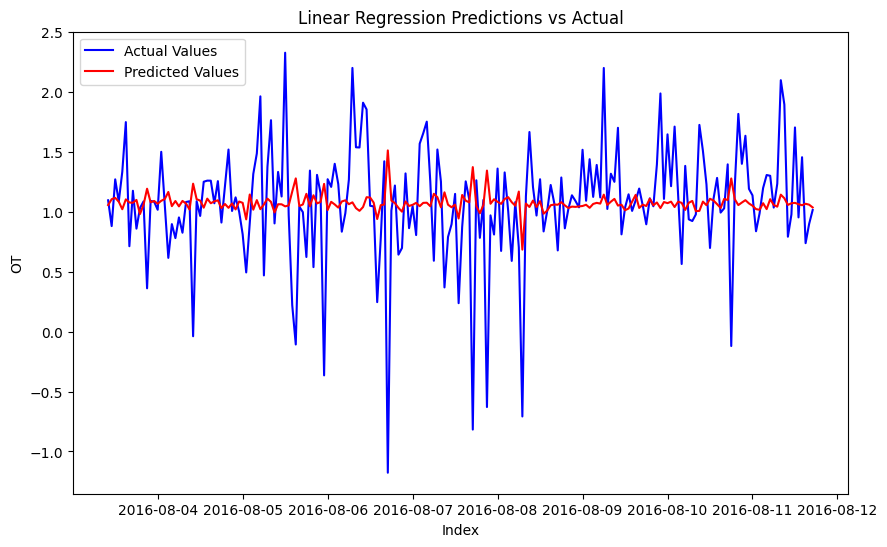

Mean Squared Error: 0.26272368391489587
Mean Absolute Error: 0.329044991927916


(LinearRegression(), 0.26272368391489587, 0.329044991927916)

In [190]:
run_linear_regression(data_df_simple_linear, ['0', '1'], 'OT')

# Dataset with 3 variables + noise, 1 confounding one (NON-LINEAR)

In [129]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) * np.cos(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': np.full(seq_length, C),
        '1': X,
        'OT': Y
    })
    return data_df

# Generate data
# Generate and save the data
data_df = generate_data(seq_length=1000) # Set the desired number of rows
data_df_simple_nonlinear= data_df.copy()
data_df.to_csv('data_causal_2.csv', index=False)



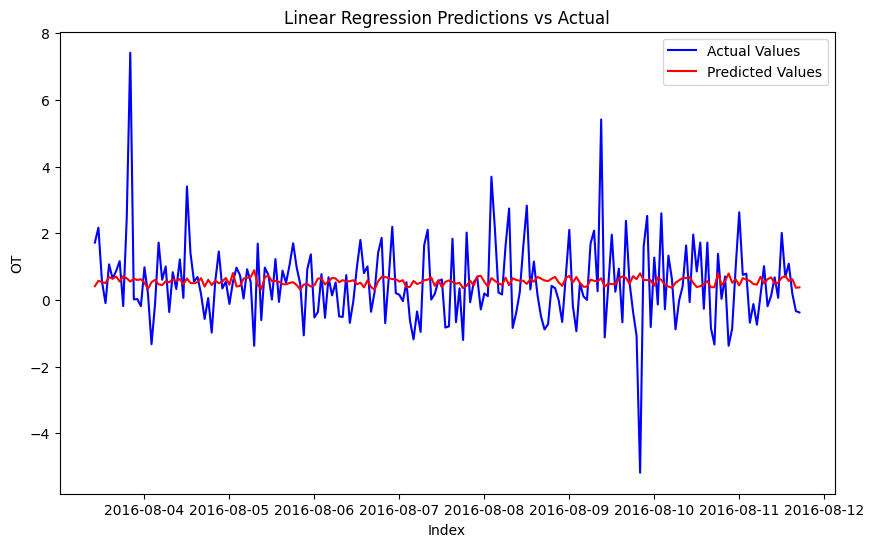

Mean Squared Error: 1.5000070830185999
Mean Absolute Error: 0.8707738206614231


(LinearRegression(), 1.5000070830185999, 0.8707738206614231)

In [130]:
run_linear_regression(data_df_simple_nonlinear, ['0', '1'], 'OT')

# Dataset with 5 variables + noise, 1 confounding one, 2 without causal impact

In [178]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) + np.cos(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)

    D = np.random.normal(loc=0, scale=0.8, size=seq_length) + np.sin(C) #no causal impact on traget Y (OT)
    E = np.square(X) * np.cos(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    

    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        '2': D,
        '3': E,
        'OT': Y #OT is the target, influenced by C & X
    })
    return data_df

# Set the desired number of rows


# Generate and save the data
data_df = generate_data(seq_length=3000) # Set the desired number of rows
data_df.to_csv('data_causal_4.csv', index=False)

data_df_complex_linear = data_df.copy()

In [181]:
# data_df_complex_linear.index = data_df_complex_linear['date']
# plt.figure(figsize=(10, 6))
# plt.plot(data_df_complex_linear.index, data_df_complex_linear["OT"], label='Actual Values', color='blue')
# plt.show()

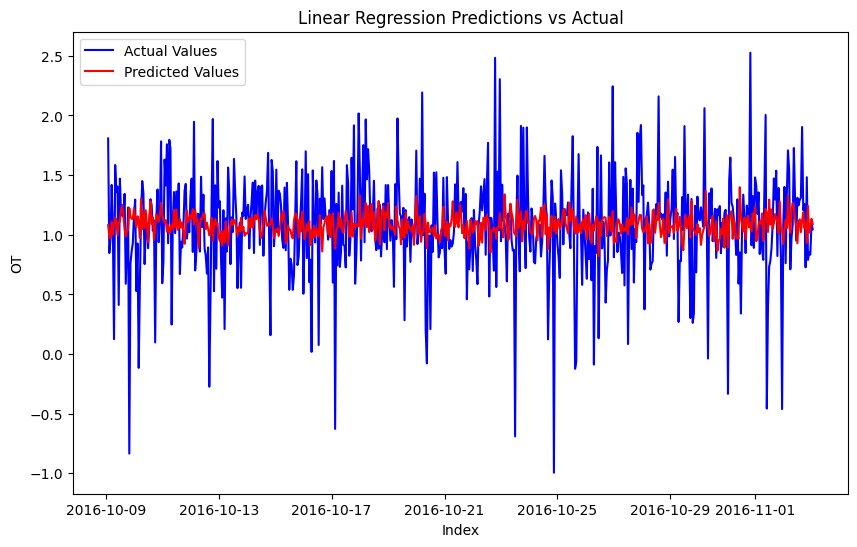

Mean Squared Error: 0.18134906977979995
Mean Absolute Error: 0.309882867352585


(LinearRegression(), 0.18134906977979995, 0.309882867352585)

In [183]:
run_linear_regression(data_df_complex_linear, ['0', '1', '2', '3'], 'OT')

In [58]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generate_data(seq_length=1000):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=seq_length)
    
    D = np.random.normal(loc=0, scale=0.8, size=seq_length) + np.sin(C) #no causal impact on traget Y (OT)
    # Prepare timestamps
    start_date = datetime.strptime('01/07/2016 02:00', '%d/%m/%Y %H:%M')
    timestamps = [start_date + timedelta(hours=i) for i in range(seq_length)]
    
    # Generate X influenced by C
    X = np.sin(C) + np.random.normal(loc=0, scale=0.2, size=seq_length)
    # Generate Y influenced by X and C in a non-linear way
    Y = np.square(X) * np.cos(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    
    E = np.square(X) * np.cos(C) + np.random.normal(loc=0, scale=0.8, size=seq_length)
    
    # Create DataFrame
    data_df = pd.DataFrame({
        'date': timestamps,
        '0': C,
        '1': X,
        '2': D,
        '3': E,
        'OT': Y #OT is the target, influenced by C & X
    })
    return data_df

# Set the desired number of rows


# Generate and save the data
data_df = generate_data(seq_length=3000) # Set the desired number of rows
data_df.to_csv('data_causal_4.csv', index=False)

data_df_complex_nonlinear = data_df

## Baselines!

## data_df_simple_linear

In [63]:
data_df_simple_linear

,date,0,1,OT
0,2016-07-01 02:00:00,0.966673,0.740733,1.479669
1,2016-07-01 03:00:00,0.932879,-1.017586,1.592570
2,2016-07-01 04:00:00,0.725855,0.967657,2.684124
3,2016-07-01 05:00:00,0.382565,1.117871,2.704597
4,2016-07-01 06:00:00,-0.421994,0.172615,0.472115
...,...,...,...,...
995,2016-08-11 13:00:00,0.202893,0.281713,0.660074
996,2016-08-11 14:00:00,-2.254518,-0.240322,-1.030998
997,2016-08-11 15:00:00,-0.314002,-0.088476,0.310916
998,2016-08-11 16:00:00,0.884794,-0.054337,-0.992856


In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def run_linear_regression(data, feature_cols, target_col, test_ratio=0.2):
    """
    Run linear regression on the provided dataset.

    Parameters:
    data (DataFrame): The input data containing features and target.
    feature_cols (list): The names of the columns to be used as features.
    target_col (str): The name of the column to be used as the target.
    test_ratio (float): The proportion of the dataset to include in the test split.

    Returns:
    model: The trained Linear Regression model.
    mse: Mean Squared Error of the model on the test set.
    mae: Mean Absolute Error of the model on the test set.
    """
    data.index = data['date']
    # Split the data by index for a time series prediction context
    test_size = int(len(data) * test_ratio)
    train_data = data.iloc[:-test_size]
    test_data = data.iloc[-test_size:]

    X_train = train_data[feature_cols]
    Y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    Y_test = test_data[target_col]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Calculate error metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
    plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
    plt.title('Linear Regression Predictions vs Actual')
    plt.xlabel('Index')
    plt.ylabel(target_col)
    plt.legend()
    plt.show()

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    return model, mse, mae



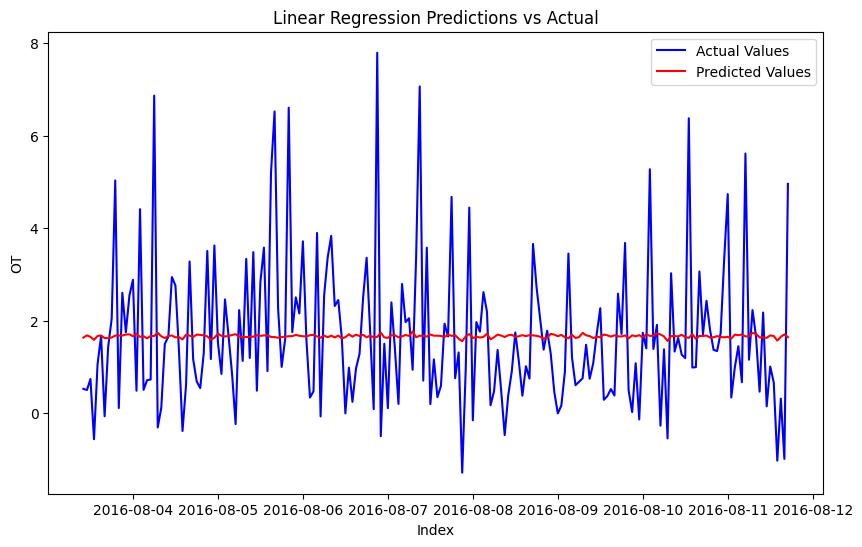

Mean Squared Error: 2.5313751680681587
Mean Absolute Error: 1.1813410350086615


(LinearRegression(), 2.5313751680681587, 1.1813410350086615)

In [71]:
run_linear_regression(data_df_simple_linear, ['0', '1'], 'OT')

Mean Squared Error: 2.869499696118694
Mean Absolute Error: 1.2415997055924057


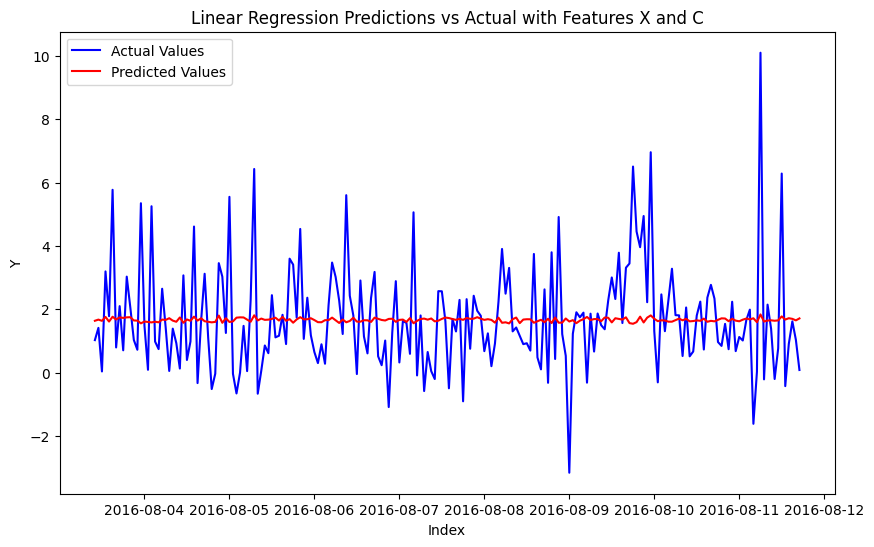

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = data_df_simple_linear.copy() # Update path as necessary
data.index = data["date"]
# Select features and target
X = data[['0', '1']]
Y = data['OT']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[['0', '1']]
Y_train = train_data['OT']
X_test = test_data[['0', '1']]
Y_test = test_data['OT']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


Mean Squared Error: 1.644891152896642
Mean Absolute Error: 1.0106338398733021


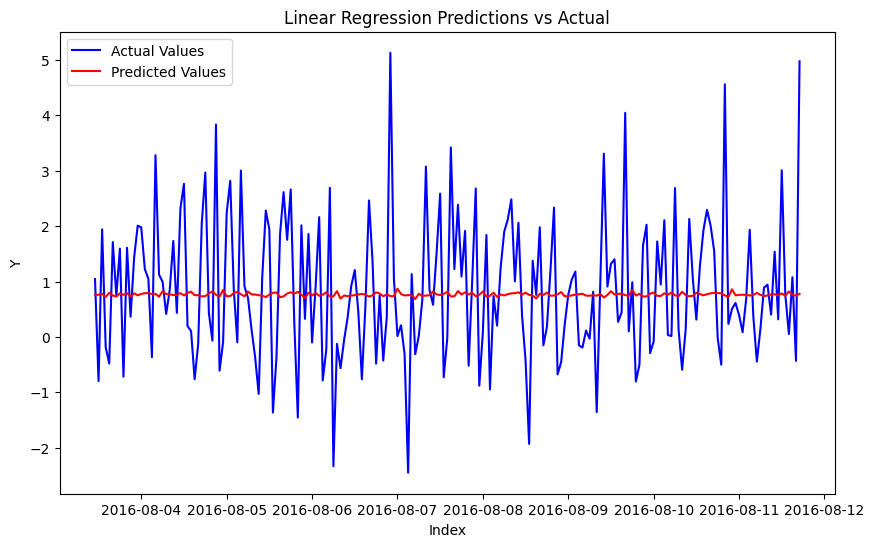

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = data_df.copy()  # make sure your data path is correct
Y = data['Y']

# Create lag features
data['Y_lag1'] = Y.shift(1)
data['Y_lag2'] = Y.shift(2)

# Remove NaN values that result from the lag operation
data = data.dropna()

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index
train_data = data[:-test_size]
test_data = data[-test_size:]

# Define features and target
X_train = train_data[['Y_lag1', 'Y_lag2']]
Y_train = train_data['Y']
X_test = test_data[['Y_lag1', 'Y_lag2']]
Y_test = test_data['Y']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = data_df  # Update path as necessary

# Select features and target
X = data[['X', 'C']]
Y = data['Y']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[['X', 'C']]
Y_train = train_data['Y']
X_test = test_data[['X', 'C']]
Y_test = test_data['Y']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


KeyError: "None of [Index(['X', 'C'], dtype='object')] are in the [columns]"

In [78]:
data_df

,date,0,1,OT
0,2016-07-01 02:00:00,0.319940,0.219588,1.196932
1,2016-07-01 03:00:00,0.385308,-0.497375,1.006739
2,2016-07-01 04:00:00,-0.942470,-1.360758,1.398245
3,2016-07-01 05:00:00,0.104528,-0.783378,1.634444
4,2016-07-01 06:00:00,0.792911,0.258154,-0.045223
...,...,...,...,...
995,2016-08-11 13:00:00,0.406236,-0.068060,-0.428902
996,2016-08-11 14:00:00,1.882956,0.121554,0.905303
997,2016-08-11 15:00:00,1.659560,-0.229964,1.616727
998,2016-08-11 16:00:00,0.558850,-0.733833,1.032354


In [77]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
data = 0
# Load your dataset
data = data_df  # Update path as necessary

# Select features and target
X = data[['X', 'C']]
Y = data['Y']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[['X', 'C']]
Y_train = train_data['Y']
X_test = test_data[['X', 'C']]
Y_test = test_data['Y']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


KeyError: "None of [Index(['X', 'C'], dtype='object')] are in the [columns]"

In [43]:
data_df3

,date,0,1,2,3,OT
0,2016-07-01 02:00:00,-0.352822,-0.409858,-0.505936,0.083544,0.441378
1,2016-07-01 03:00:00,0.392530,0.225523,1.092889,0.121622,1.896103
2,2016-07-01 04:00:00,1.291451,0.933349,1.102326,0.125796,-0.135328
3,2016-07-01 05:00:00,-0.570826,-0.627299,-0.350626,0.305134,1.048835
4,2016-07-01 06:00:00,0.617017,0.682011,-0.099283,0.121796,0.405358
...,...,...,...,...,...,...
2995,2016-11-02 21:00:00,-0.296730,-0.121767,-0.838905,-0.241487,2.004070
2996,2016-11-02 22:00:00,0.107100,-0.007417,1.050701,0.006618,0.624499
2997,2016-11-02 23:00:00,1.084363,0.872346,-0.552176,0.109519,1.832230
2998,2016-11-03 00:00:00,-1.829897,-0.981977,-0.609478,-0.133088,0.752449


Mean Squared Error: 0.7593857994063179
Mean Absolute Error: 0.6953434450126695


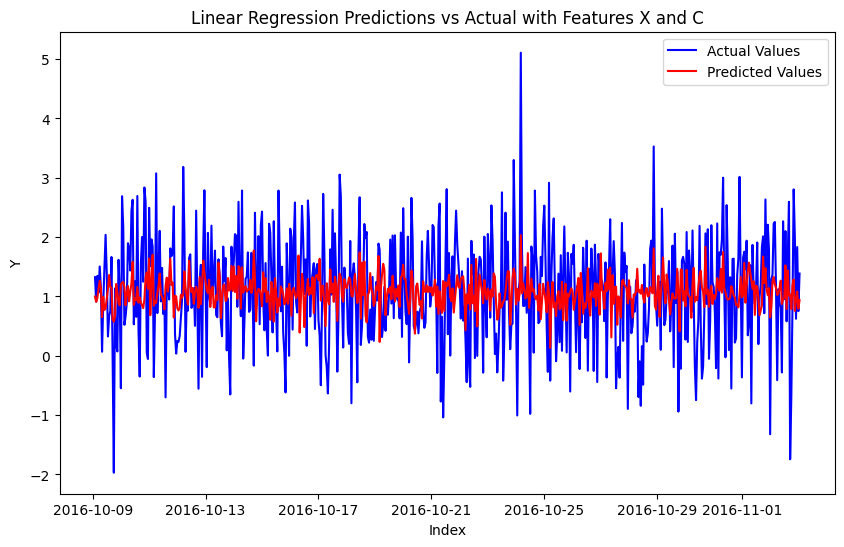

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
data = 0
# Load your dataset
data = data_df3  # Update path as necessary

# Select features and target
X = data[["0","1","2","3"]]
Y = data['OT']

# Define the size of the test set
test_size = int(len(data) * 0.2)  # e.g., 20% of the data as test set

# Split the data by index for a time series prediction context
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

X_train = train_data[["0","1","2","3"]]
Y_train = train_data['OT']
X_test = test_data[["0","1","2","3"]]
Y_test = test_data['OT']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual Values', color='blue')
plt.plot(Y_test.index, Y_pred, label='Predicted Values', color='red')
plt.title('Linear Regression Predictions vs Actual with Features X and C')
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.show()


OLD:

In [1]:
import numpy as np
import pandas as pd
from datasets import DatasetDict, Dataset

def generate_complex_data(n_samples=20, seq_length=1000): #(n_samples=862, seq_length=17544):
    # Generate the confounder C
    C = np.random.normal(loc=0, scale=1, size=n_samples)
    
    data = []
    for i in range(n_samples):
        # X is influenced by C
        X = np.sin(C[i]) + np.random.normal(loc=0, scale=0.2, size=seq_length)
        # Y is influenced by X and C in a non-linear way
        Y = np.square(X) + np.cos(C[i]) + np.random.normal(loc=0, scale=0.2, size=seq_length)
        
        item = {
            'start': pd.Period('2015-01-01 00:00', freq='H').strftime('%Y-%m-%d %H:%M'),
            'target': Y.tolist(),
            'feat_static_cat': [i],
            'feat_dynamic_real': None,
            'item_id': f'T{i+1}'
        }
        data.append(item)
    
    return data

# Generate the test dataset with the maximum length
test_data = generate_complex_data(seq_length=1000)

# Create the validation dataset by removing the last 48 elements from each target sequence
validation_data = [{**item, 'target': item['target'][:-48]} for item in test_data]

# Create the train dataset by removing the last 96 elements from each target sequence
train_data = [{**item, 'target': item['target'][:-96]} for item in test_data]

# Create the DatasetDict
dataset_dict = DatasetDict({
    'train': Dataset.from_list(train_data),
    'validation': Dataset.from_list(validation_data),
    'test': Dataset.from_list(test_data)
})

# Print the dataset structure
print(dataset_dict)

# Access an example from the train dataset
print(dataset_dict['train'][0])

c:\Users\florisschouw\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 20
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 20
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 20
    })
})
{'start': '2015-01-01 00:00', 'target': [1.7498655105034728, 1.0408262439097655, 1.1505409109563292, 1.2627998146258197, 1.238665299384904, 1.3301700691138518, 1.0123280313774812, 1.4308180130979427, 1.2262508245770178, 1.3409557683246331, 0.8814832444151004, 1.2497933010890205, 1.263116596167181, 0.7884447724249355, 1.3843831872058923, 1.2861955411856403, 0.9774263609314559, 1.5375537780481667, 1.330914945207989, 0.9265989419078962, 0.9801024042930833, 1.4303072720791095, 1.2385973315265868, 1.028544063060652, 0.944190692185495, 0.9978577024601392, 1.4141